<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week6/Spring2SU_RecommenderSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# BASED on code from Derrick Mwiti - More here:
# https://github.com/mwitiderrick

%matplotlib inline
from datetime import datetime
from IPython.display import Markdown
from os.path import join
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Use Nate Silver's Sports & Politics Style
plt.style.use('fivethirtyeight')

In [2]:
# OBTAIN

!mkdir -p raw
!curl -O http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -o ml-100k.zip -d raw/
!rm ml-100k.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4808k  100 4808k    0     0  7466k      0 --:--:-- --:--:-- --:--:-- 7466k
Archive:  ml-100k.zip
   creating: raw/ml-100k/
  inflating: raw/ml-100k/allbut.pl   
  inflating: raw/ml-100k/mku.sh      
  inflating: raw/ml-100k/README      
  inflating: raw/ml-100k/u.data      
  inflating: raw/ml-100k/u.genre     
  inflating: raw/ml-100k/u.info      
  inflating: raw/ml-100k/u.item      
  inflating: raw/ml-100k/u.occupation  
  inflating: raw/ml-100k/u.user      
  inflating: raw/ml-100k/u1.base     
  inflating: raw/ml-100k/u1.test     
  inflating: raw/ml-100k/u2.base     
  inflating: raw/ml-100k/u2.test     
  inflating: raw/ml-100k/u3.base     
  inflating: raw/ml-100k/u3.test     
  inflating: raw/ml-100k/u4.base     
  inflating: raw/ml-100k/u4.test     
  inflating: raw/ml-100k/u5.base     
  inflating: raw/ml-100k/u5.t

In [13]:
# <!-- collapse=True -->
ratings_df = pd.read_csv('raw/ml-100k/u.data', sep='\t', header=None, 
                         names=['userId', 'movieId', 'rating', 'timestamp'])
ratings_df['timestamp'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] = ratings_df['timestamp'].dt.month
ratings_df = ratings_df.sort_values('timestamp')
print('First 5:')
display(ratings_df.head())
print()
print('Last 5:')
display(ratings_df.tail())

First 5:


,userId,movieId,rating,timestamp,year,month
214,259,255,4,1997-09-20 03:05:10,1997,9
83965,259,286,4,1997-09-20 03:05:27,1997,9
43027,259,298,4,1997-09-20 03:05:54,1997,9
21396,259,185,4,1997-09-20 03:06:21,1997,9
82655,259,173,4,1997-09-20 03:07:23,1997,9



Last 5:


,userId,movieId,rating,timestamp,year,month
46773,729,689,4,1998-04-22 23:10:38,1998,4
73008,729,313,3,1998-04-22 23:10:38,1998,4
46574,729,328,3,1998-04-22 23:10:38,1998,4
64312,729,748,4,1998-04-22 23:10:38,1998,4
79208,729,272,4,1998-04-22 23:10:38,1998,4


CONSIDER DOING EXPLORATORY DATA ANALYSIS

In [53]:
# Consider adding titles

movie_titles = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/simple-recommender-/master/Movie_Id_Titles',
                           header = 1, names=['movieId', 'title'])

#movie_titles = pd.read_csv('raw/ml-100k/u.item', sep='\t', header=None, 
#                         names=['movieId', 'movie_titles', 'releasedate',
#                                'videodate', 'IMDb', 'unknown', 'Action', 'Adventure',
#                                'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
#                                'Drama', 'Fantasy', 'Noir', 'Horror', 'Musical', 'Mystery',
#                                'Romance',  'SciFi', 'Thriller', 'War', 'Western'])

movie_titles.head()


,movieId,title
0,2,GoldenEye (1995)
1,3,Four Rooms (1995)
2,4,Get Shorty (1995)
3,5,Copycat (1995)
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...


In [54]:
ratings = pd.merge(ratings_df, movie_titles, on='movieId')
ratings.head()

,userId,movieId,rating,timestamp,year,month,title
0,259,255,4,1997-09-20 03:05:10,1997,9,My Best Friend's Wedding (1997)
1,119,255,3,1997-09-20 17:18:34,1997,9,My Best Friend's Wedding (1997)
2,130,255,4,1997-09-22 18:43:14,1997,9,My Best Friend's Wedding (1997)
3,342,255,4,1997-09-23 03:16:14,1997,9,My Best Friend's Wedding (1997)
4,30,255,4,1997-09-24 00:13:04,1997,9,My Best Friend's Wedding (1997)


In [15]:
# EXPLORE

# ratingsEDA = pd.DataFrame(ratings.groupby('month')['rating'].mean())

# ratingsEDA.head()

,rating
month,
1,3.395796
2,3.453773
3,3.548525
4,3.572884
9,3.536293


In [55]:
# SCRUB - ADD NUMBER OF RATINGS TO MOVIE ID
ratings['number_of_ratings'] = ratings_df.groupby('movieId')['rating'].count()
ratings.head()

,userId,movieId,rating,timestamp,year,month,title,number_of_ratings
0,259,255,4,1997-09-20 03:05:10,1997,9,My Best Friend's Wedding (1997),NaN
1,119,255,3,1997-09-20 17:18:34,1997,9,My Best Friend's Wedding (1997),452.0
2,130,255,4,1997-09-22 18:43:14,1997,9,My Best Friend's Wedding (1997),131.0
3,342,255,4,1997-09-23 03:16:14,1997,9,My Best Friend's Wedding (1997),90.0
4,30,255,4,1997-09-24 00:13:04,1997,9,My Best Friend's Wedding (1997),209.0


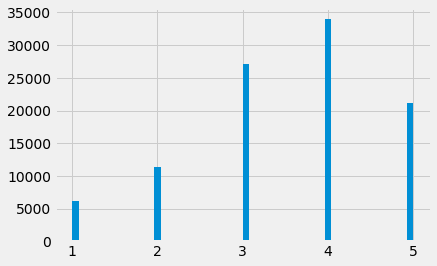

In [17]:
# EXPLORE - Look at distribution of ratings
# ratings['rating'].hist(bins=50)

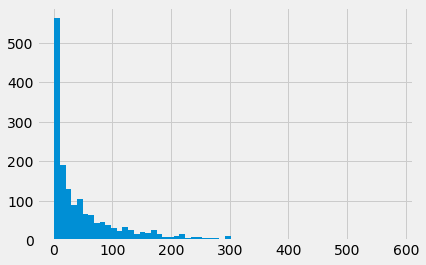

In [18]:
# EXPLORE - Look at number of ratings 
# ratings['number_of_ratings'].hist(bins=60)


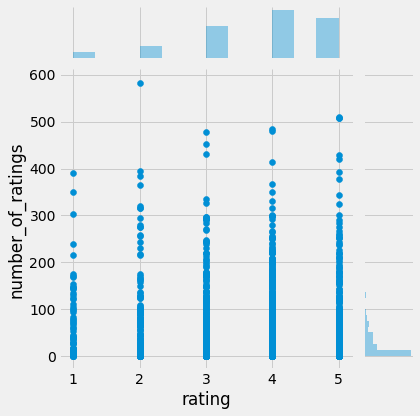

In [19]:
# EXPLORE - Look at relationship between # of ratings and rating
# sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


In [56]:
# SCRUB - Create matrix for recommender system

movie_matrix = ratings.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [57]:
# SCRUB - Order by movies with most number of ratings

ratings.sort_values('number_of_ratings', ascending=False).head(10)


,userId,movieId,rating,timestamp,year,month,title,number_of_ratings
50,672,255,2,1997-11-17 17:54:38,1997,11,My Best Friend's Wedding (1997),583.0
258,140,286,5,1997-11-08 18:26:57,1997,11,"English Patient, The (1996)",509.0
100,671,255,5,1998-01-09 19:47:01,1998,1,My Best Friend's Wedding (1997),508.0
181,76,286,5,1997-09-23 15:06:46,1997,9,"English Patient, The (1996)",507.0
294,750,286,4,1997-11-13 18:29:15,1997,11,"English Patient, The (1996)",485.0
286,321,286,4,1997-11-13 16:35:32,1997,11,"English Patient, The (1996)",481.0
288,47,286,3,1997-11-13 16:36:24,1997,11,"English Patient, The (1996)",478.0
1,119,255,3,1997-09-20 17:18:34,1997,9,My Best Friend's Wedding (1997),452.0
300,754,286,3,1997-11-13 19:55:47,1997,11,"English Patient, The (1996)",431.0
121,83,255,5,1998-02-16 21:43:42,1998,2,My Best Friend's Wedding (1997),429.0


In [0]:
# SCRUB - Pull out two movies for analysis

AFO_user_rating = movie_matrix['Air Force One (1997)']
young_user_rating = movie_matrix['Butcher Boy, The (1998)']
#young_user_rating = movie_matrix['Young Guns (1988)']

In [81]:
# ANALYZE - NOW LOOK FOR TOP FIVE MOVIES RELATED TO AFO

similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)
similar_to_air_force_one.head()


title
'Til There Was You (1997)    0.867722
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.221943
12 Angry Men (1957)          0.228031
187 (1997)                   0.294232
dtype: float64

In [82]:
# ANALYZE - NOW LOOK FOR TOP FIVE MOVIES RELATED TO THE BUTCHER BOY
# SECOND PASS LOOK FOR YOUNG GUNS

similar_to_young=movie_matrix.corrwith(young_user_rating)
similar_to_young.head(10)

title
'Til There Was You (1997)                     NaN
1-900 (1994)                                  NaN
101 Dalmatians (1996)                         NaN
12 Angry Men (1957)                           NaN
187 (1997)                                    NaN
2 Days in the Valley (1996)                   NaN
20,000 Leagues Under the Sea (1954)           NaN
2001: A Space Odyssey (1968)                  NaN
3 Ninjas: High Noon At Mega Mountain (1998)   NaN
39 Steps, The (1935)                          NaN
dtype: float64

In [83]:
# SCRUB - REMOVE NA FROM CORR MATRIX

corr_young = pd.DataFrame(similar_to_young, columns=['Correlation'])
corr_young.dropna(inplace=True)
corr_young.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
